## Hierarchical Clustering

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [1]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

The basic idea in Hierarchical Clustering is to group the clusters by some metric in a step by step fashion. There are basically two ways by which we can do that.
- Agglomerative (Botton up)
- Divisive (Top down)

##### Algorithm (Agglomerative)

1. Make each point a single cluster. (Forms N clusters.)
2. Take the two closest data points and make them one cluster.
3. Take the two closest clusters and make them one cluster
4. Repeat step 3 until there is only one cluster
5. End

Then we devise a metric to measure the distance, Euclidean distance is the most popular metric that we can use.
And we can estimate the distance between the clusters by different means. They are,
- Closest points
- Furthest Points
- Average Distance
- Distance Between Centroids

##### Optimising
Since we result with only one cluster in the end, There should be a method to select the optimum number of clusters in the end. For that, [Dendrograms](#dend) are used.

<img src='https://i.stack.imgur.com/JWbMJ.jpg' style="margin:0px;" width=600>

From this we set a threshold for the estimated distances and then we select the number of clusters below that. Another simple and intuitive way to deal with this is by selecting the longest vertical line which is undivided by any horizontal line when extended and then setting the treshold on that line.

<a id='preprocessing'></a>
### Pre processing

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
x = dataset.iloc[:, [3,4]].values

<a id='building'></a>
### Building the model.
Building the model using HC

In [11]:
import scipy.cluster.hierarchy as sch

We use dendograms to find the optimal number of cluster

In [28]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

Here, the linkage function returns the linkage matrix of the hierarchical clusters that are built. The dendrogram function returns the values in such a way that we can plot and visualise the dendrogram. The ward method is a method that estimates the distance using the Ward variance minimization algorithm.
<a id='dend'></a>

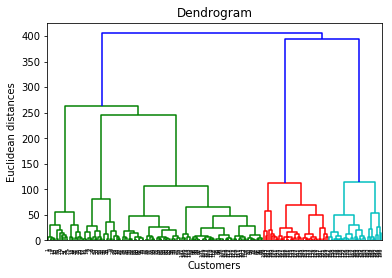

In [29]:
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Using the longest horizontal line, we can determine the number of clusters. The total number of clusters optimal for this model will be 5.

In [18]:
# Building and fitting the model in HC
from sklearn.cluster import AgglomerativeClustering

In [19]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

<a id='result'></a>
### Result

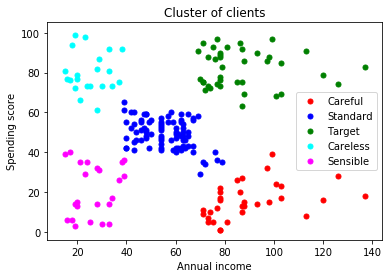

In [25]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=25, c = 'red', label = 'Careful')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=25, c = 'blue', label = 'Standard')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=25, c = 'green', label = 'Target')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=25, c = 'cyan', label = 'Careless')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=25, c = 'magenta', label = 'Sensible')
plt.title('Cluster of clients')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

We can see that, this clustering has given us almost similar results like the K-Means clustering. And we can classify the customers accordingly.